In [ ]:
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime as dt
import warnings 

# ignores all warning messages
warnings.filterwarnings("ignore")

df = pd.read_csv("Combine.csv")
#del df['Scheduled Generation [MW] (D) - BZN|FR']
price = "Day-ahead Price [EUR/MWh]" 

# apply interpolation to create continuity in dataset 
df = df.interpolate(method="cubic")

# remove spaces from string right and left sie " xxx " -> "xxx"
df['Time(CET)'] = df['Time(CET)'].apply(lambda x: x.strip())

# converts dataframe column "cet_timestampe" to datetime
df['Time(CET)'] = df['Time(CET)'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

df = df.set_index("Time(CET)") # set time as index

dd=df[price].resample('D').mean()

alli=[]
for i in dd.values:
    mul=[i]*24
    alli += mul
df= df.reset_index().drop_duplicates(subset="Time(CET)",keep='first').set_index("Time(CET)")
df["daily"]=alli




df_size = len(df[-12130:])*0.93 # take 95 of the data starting from 17538
# splitting data to train and test
df_train, df_test = df[:int(df_size)], df[int(df_size):]
print(df_train.shape) 
print(df_test.shape)


(11280, 7)
(8472, 7)


The AIC Value 4878.168325426192
The BIC Value 5308.843430361637
MAE 2.994812621068038


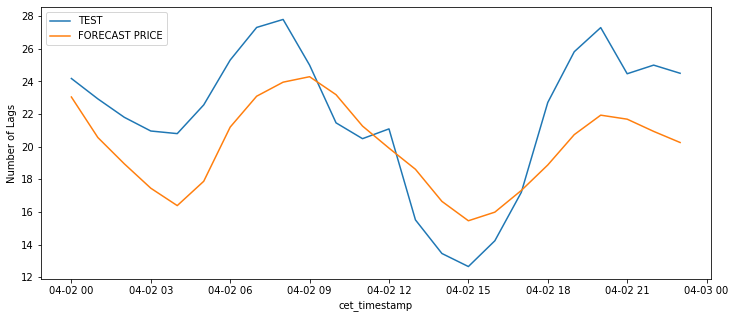

In [ ]:
import statsmodels.api as sm
import pandas as pd


subset_df = df.loc['2020-03-24 23:00:00':'2020-04-02 23:00:00', ['Day-ahead Price [EUR/MWh]', 'Actual Total Load [MW] - BZN|FR', 'daily']]

train = subset_df[:-24]
test = subset_df[-24:]

endog = train[['Day-ahead Price [EUR/MWh]', 'daily', "Actual Total Load [MW] - BZN|FR"]]
exog_train = subset_df['Actual Total Load [MW] - BZN|FR'][:-24]



model = sm.tsa.VARMAX(endog, order=(9,5),trend='n')
model_result = model.fit(maxiter=0, disp=False)

print("The AIC Value", model_result.aic)
print("The BIC Value", model_result.bic)

forecast = model_result.forecast(steps = 24)
#forecasting 24hrs ahead which means it is hourly forecasting for day ahead price
Mae=mean_absolute_error(test.iloc[:,0],forecast.iloc[:,0])
MSE= mean_squared_error(test.iloc[:,0],forecast.iloc[:,0])
#print('MSE: %f' %MSE)
print("MAE",Mae)
plt.figure(figsize=(12,5))
plt.plot(test["Day-ahead Price [EUR/MWh]"],label ="TEST")
plt.plot(forecast["Day-ahead Price [EUR/MWh]"],label="FORECAST PRICE")


plt.legend()
plt.xlabel('cet_timestamp')
plt.ylabel('Number of Lags')
plt.show()

